# 一変数での数式化と考察
高等教育レベルの物理理論や化学理論などがまさしくそうだが、1変数に対して公式が存在する。その見つけ方については散布図を作成してそれっぽい線を引けばおおよその主張はできるが厳密な事を考えると多項式によって係数と切片を数値化する必要がある。そこで統計的学で多く使用される最小二乗法を用いた単回帰および多項式回帰を行う。

# ライブラリのインポート

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 線形の数式を算出する場合
ここでは線形の数式を作成するために単回帰分析を行う。使用する式は垂直投射である。

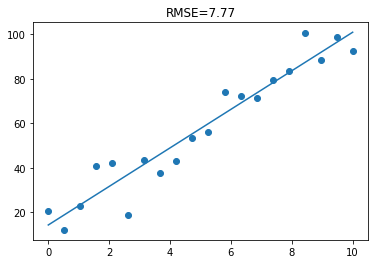

v=14+8.66t


In [ ]:
np.random.seed(0)
t = np.linspace(0, 10, 20).reshape(-1, 1)
g = 9.8
v0 = 3
v = v0 + g * t
v = v + np.random.normal(loc=0, scale=10, size=(len(v), 1))
model = LR()
model.fit(t, v)
y_pred = model.predict(t)
plt.scatter(t, v)
plt.plot(t, y_pred)
plt.title("RMSE=%.2f"%(np.sqrt(mean_squared_error(v,y_pred))))
plt.show()
if model.coef_ >= 0:
  print("v=%2.f+%.2ft"%(model.intercept_, model.coef_))
else:
  print("v=%2.f%.2ft"%(model.intercept_, model.coef_))

# 多項式の数式を算出する場合
ここでは非線形である数式の算出として多項式回帰を行う。使用する式は運動エネルギーである。

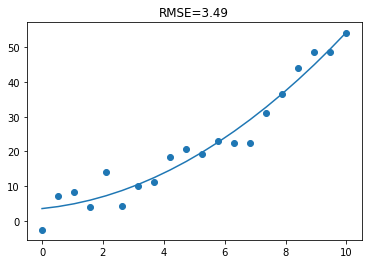

E=+0.87v^1+0.42v^2+3.50


In [ ]:
v = np.linspace(0, 10, 20).reshape(-1, 1)
m = 10
E = (m + v * v) / 2
E = E + np.random.normal(loc=0, scale=3, size=(len(E), 1))
poly2 = PolynomialFeatures(degree=2)
v_poly = poly2.fit_transform(v)
model = LR()
model.fit(v_poly, E)
y_pred = model.predict(v_poly)
plt.scatter(v, E)
plt.plot(v, y_pred)
plt.title("RMSE=%.2f"%(np.sqrt(mean_squared_error(E,y_pred))))
plt.show()
for i in range(len(model.coef_[0])):
  if i == 0:
    print("E=", end="")
  else:
    if model.coef_[0][i] >= 0:
      print("+%.2fv^%d"%(model.coef_[0][i], i), end="")
    else:
      print("%.2fv^%d"%(model.coef_[0][i], i), end="")
if model.intercept_[0] >= 0:
  print("+%.2f"%(model.intercept_[0]))
else:
  print("%.2f"%(model.intercept_[0]))

# 正則化
ここまでは非常に簡単な分布であったため散布図を見ただけで立式化が分かるものであったが、実際には多項式回帰で分かりやすい分布は多いとは言えない。しかし下手に項数を増やすと過剰適合(過学習)してしまうため正則化を行い過学習を防ぐ。

ここでは多項式回帰で50次式作成して線形回帰の方では過剰適合させる。それに対してLasso回帰で過剰適合を抑えるところが確認できる。正則化の仕組みとしては学習して生成された式に罰則項を作成して学習パラメータ(係数)を抑える。Lasso回帰では罰則項に絶対値を用いる。他の正則化としてRidge回帰では罰則項に各係数の2乗を用いる。

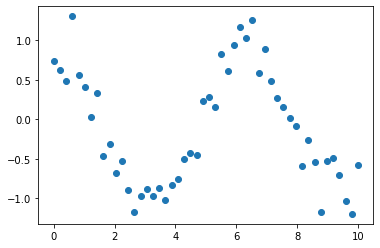

In [ ]:
x = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.cos(x) + np.random.normal(loc=0, scale=0.25, size=(len(x), 1))
plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e+00, tolerance: 2.607e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


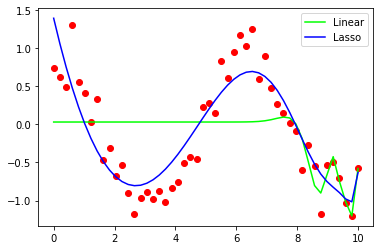

In [ ]:
poly = PolynomialFeatures(degree=50)
x_poly = poly.fit_transform(x)
model1 = LR()
model1.fit(x_poly, y)
y_pred_Linear = model1.predict(x_poly)
model2 = Lasso(alpha=0.001)
model2.fit(x_poly, y)
y_pred_Lasso = model2.predict(x_poly)
plt.plot(x,y_pred_Linear, label="Linear", color="#00FF00")
plt.plot(x,y_pred_Lasso, label="Lasso", color="#0000FF")
plt.scatter(x, y, color="#FF0000")
plt.legend()
plt.show()

# 係数の確認
Lasso回帰で過剰適合が抑えられることが分かった。そこで係数に注目する。極値の数は一回微分した時の最高次数に影響されるため係数の配列を出力して最後の方の数値に着目するとどの程度過剰適合が抑えられたかが分かる。

線形回帰の場合

In [ ]:
model1.coef_[0]

array([-2.10979039e-37, -4.49914212e-41,  1.21974170e-43,  1.48286067e-45,
       -2.11023746e-48, -1.21422866e-50,  1.33638236e-51,  5.83631127e-64,
        1.46696725e-63,  1.12435254e-62,  8.55871134e-62,  6.47719839e-61,
        4.87628721e-60,  3.65291004e-59,  2.72317620e-58,  2.02012423e-57,
        1.49100064e-56,  1.09463335e-55,  7.99117942e-55,  5.79873952e-54,
        4.18056808e-53,  2.99283491e-52,  2.12622278e-51,  1.49798872e-50,
        1.04576680e-49,  7.22755738e-49,  4.93998104e-48,  3.33514627e-47,
        2.22104717e-46,  1.45664070e-45,  9.39021536e-45,  5.93679296e-44,
        3.67125035e-43,  2.21333408e-42,  1.29572155e-41,  7.32883090e-41,
        3.97965985e-40,  2.05745417e-39,  1.00144886e-38,  4.51819037e-38,
        1.84674152e-37,  6.59721569e-37,  1.93478926e-36,  4.08489793e-36,
        4.04065989e-36, -3.77205558e-36,  1.12838189e-36, -1.70438035e-37,
        1.41737125e-38, -6.21744307e-40,  1.12885319e-41])

Lasso回帰の場合

In [ ]:
model2.coef_

array([ 0.00000000e+00, -1.70602889e+00,  3.42914019e-01, -5.70163637e-04,
       -1.21611852e-03, -1.11762637e-04, -6.80862222e-06, -2.61337123e-07,
        4.11459445e-09,  2.23366258e-09,  3.11100116e-10,  3.33529315e-11,
        3.15012361e-12,  2.73538032e-13,  2.21460346e-14,  1.66787364e-15,
        1.14403683e-16,  6.70498752e-18,  2.60480724e-19, -8.18440790e-21,
       -3.57825960e-21, -5.71979358e-22, -7.30440196e-23, -8.39983183e-24,
       -9.07416380e-25, -9.39225946e-26, -9.41384041e-27, -9.19261049e-28,
       -8.77602798e-29, -8.20546761e-30, -7.51660256e-31, -6.73989744e-32,
       -5.90114336e-33, -5.02199315e-34, -4.12047220e-35, -3.21145178e-36,
       -2.30707860e-37, -1.41715942e-38, -5.49501465e-40,  2.89788501e-41,
        1.09604308e-41,  1.86580749e-42,  2.59664347e-43,  3.28696016e-44,
        3.93586894e-45,  4.54305892e-46,  5.10869061e-47,  5.63330540e-48,
        6.11774851e-49,  6.56310377e-50,  6.97063863e-51])

# 対数グラフを用いる場合
電磁気系などで実際に対数グラフを用いて近似曲線を描くことがある。コーディングの手法として片対数グラフ(目的変数が対数)の場合と両対数(説明変数・目的変数とも対数)によって書きかたを分ける必要がある。

# 片対数グラフ
データの参考：https://slidesplayer.net/slide/11539427/

R-C回路における電荷量の時間による変化

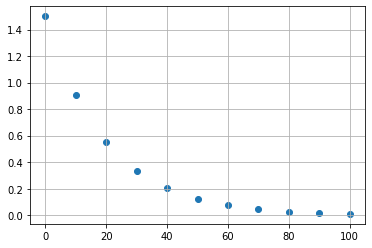

In [ ]:
t = np.linspace(0, 100, 11).reshape(-1, 1)
Q = np.array([1.5, 0.91, 0.552, 0.335, 0.203, 0.123, 0.0747, 0.0453, 0.0275, 0.0167, 0.0101])
plt.scatter(t, Q)
plt.grid(which="both")
plt.show()

縦軸を対数にして線形になることを確認

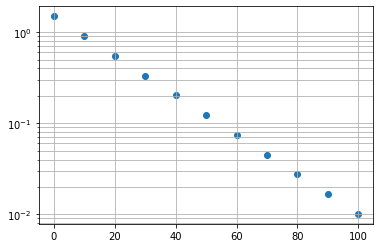

In [ ]:
plt.scatter(t, Q)
plt.yscale("log")
plt.grid(which="both")
plt.show()

# 片対数グラフとして回帰

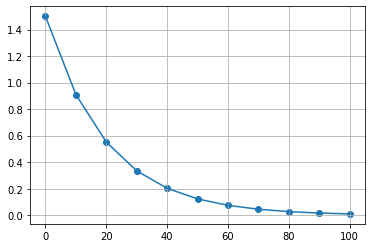

In [ ]:
model = TransformedTargetRegressor(regressor=LR(), func=np.log, inverse_func=np.exp)
model.fit(t, Q)
y_pred = model.predict(t)
plt.scatter(t, Q)
plt.plot(t, y_pred)
plt.grid(which="both")
plt.show()

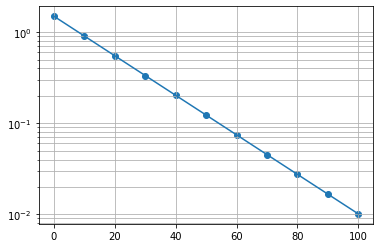

In [ ]:
plt.scatter(t, Q)
plt.plot(t, y_pred)
plt.yscale("log")
plt.grid(which="both")
plt.show()

# 両対数グラフ
データの参考：https://slidesplayer.net/slide/11539427/

員過電圧と電極に働く力の関係

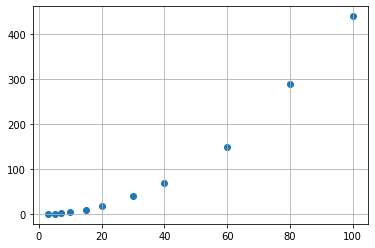

In [ ]:
V=np.array([3, 5, 7, 10, 15, 20, 30, 40, 60, 80, 100])
F=np.array([0.4, 1.1, 2.3, 4.5, 9.6, 17, 41, 70, 150, 290, 440])
plt.scatter(V, F)
plt.grid(which="both")
plt.show()

両軸を対数に変換

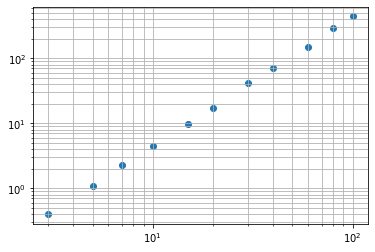

In [ ]:
plt.scatter(V, F)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.show()

# 両対数グラフとして回帰

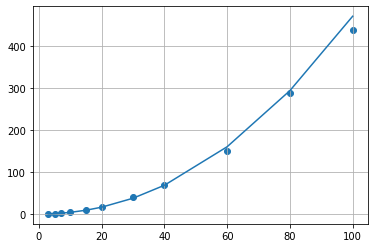

In [ ]:
trans = FunctionTransformer(np.log1p, validate=True)
V_trans = trans.transform(V.reshape(-1, 1))
V_trans = np.array(V_trans)
model = TransformedTargetRegressor(regressor=LR(), func=np.log, inverse_func=np.exp)
model.fit(V_trans, F)
y_pred = model.predict(V_trans)
plt.scatter(V, F)
plt.plot(V, y_pred)
plt.grid(which="both")
plt.show()

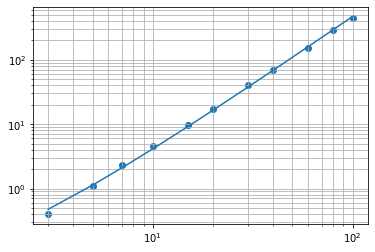

In [ ]:
plt.scatter(V, F)
plt.plot(V, y_pred)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.show()

ここまで対数グラフで回帰を行いそれぞれの対数グラフの目盛りから線形になれば立式化をすることができる。